# Introduction
 Demonstrate useful functions of Scikit-Learn Library
 
 0. An end-to-end Scikit-Learn workflow
 1. Getting the data ready
 2. Choose the right estimator/algorithm for problems
 3. Fit the model/algorithm and use it to make predictions on our data
 4. Evaluating a model
 5. Improve a model
 6. Save and load a trained model

## 0. An end-to-end Scikit-Learn workflow

In [58]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [38]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
clf.fit(X_train, y_train);

In [41]:
# Make predicition
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [42]:
y_test

186    0
101    1
131    1
129    1
106    1
      ..
198    0
242    0
24     1
275    0
235    0
Name: target, Length: 61, dtype: int64

In [43]:
# 4. Evaluate the model on training and test data
clf.score(X_train, y_train)

1.0

In [44]:
clf.score (X_test, y_test)

0.8852459016393442

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [46]:
print(confusion_matrix(y_test, y_preds))

[[26  4]
 [ 3 28]]


In [47]:
print(accuracy_score(y_test, y_preds))

0.8852459016393442


In [48]:
# 5. Improve a model
# Try different amount fo n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test_set: {clf.score(X_test, y_test) * 100} %")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test_set: 78.68852459016394 %
 
Trying model with 20 estimators...
Model accuracy on test_set: 85.24590163934425 %
 
Trying model with 30 estimators...
Model accuracy on test_set: 81.9672131147541 %
 
Trying model with 40 estimators...
Model accuracy on test_set: 86.88524590163934 %
 
Trying model with 50 estimators...
Model accuracy on test_set: 83.60655737704919 %
 
Trying model with 60 estimators...
Model accuracy on test_set: 83.60655737704919 %
 
Trying model with 70 estimators...
Model accuracy on test_set: 81.9672131147541 %
 
Trying model with 80 estimators...
Model accuracy on test_set: 86.88524590163934 %
 
Trying model with 90 estimators...
Model accuracy on test_set: 80.32786885245902 %
 


In [49]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [50]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

## 1. Preparing data for machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually as 'X' and 'y')
    2. Filling (also called imputing) or disregarding missing values.
    3. Convert non-numerial value to numerical value (also called feature encoding)

In [69]:
car_sales = pd.read_csv("Datas/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [71]:
X = car_sales.drop("Price", axis =1)
y = car_sales["Price"]

In [72]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

### 1.1 Convert data to numericals

In [103]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the headers to be transformed
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough") # Pass any other columns not in categorical features list!
transformed_X = transformer.fit_transform(X) 
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [104]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [105]:
# Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test_set: {clf.score(X_test, y_test) * 100} %")
    print(" ")


Trying model with 10 estimators...
Model accuracy on test_set: 26.58935394964982 %
 
Trying model with 20 estimators...
Model accuracy on test_set: 29.1549592722157 %
 
Trying model with 30 estimators...
Model accuracy on test_set: 27.34973388697497 %
 
Trying model with 40 estimators...
Model accuracy on test_set: 28.97585169298168 %
 
Trying model with 50 estimators...
Model accuracy on test_set: 30.14085086230479 %
 
Trying model with 60 estimators...
Model accuracy on test_set: 31.58832617448567 %
 
Trying model with 70 estimators...
Model accuracy on test_set: 31.860677416006332 %
 
Trying model with 80 estimators...
Model accuracy on test_set: 29.869323170909112 %
 
Trying model with 90 estimators...
Model accuracy on test_set: 31.51107407295377 %
 


## 1.2 Fill Missing data

1. Fill them with some value (also known as imputation)
2. Removes samples with missing data

In [4]:
# Import car sales with missing data
car_sales_missing = pd.read_csv("Datas/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [90]:
# Show sum of missing data in each columns
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: Fill missing data with pandas

In [93]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Door" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [94]:
 # Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [95]:
# Check for any missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [96]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [99]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the headers to be transformed
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough") # Pass any other columns not in categorical features list!
transformed_X = transformer.fit_transform(car_sales_missing) 
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [100]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2: Fill missing data with scikit learn

1. Drop rows that has missing values in the target!

In [5]:
car_sales_missing = pd.read_csv("Datas/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [6]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [7]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [8]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Tranform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [9]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [10]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [11]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the headers to be transformed
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough") # Pass any other columns not in categorical features list!
transformed_X = transformer.fit_transform(car_sales_filled) 
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

 ## 2. Choosing right estimator/algorithm for problem
 
 Scikit-Learn uses estimator as another term for machine learning model or algorithm.
 
 * Classification - predicting wether a sample is one or another
 * Regressor - predicting a number

### The map for scikit-learn of ML
![](scikit_ml_map.jpg)

### 2.1 Picking ML model for a regression problem

In [13]:
# Import Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [30]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [20]:
# How many data we have?
len(boston_df)

506

In [42]:
# Let's try Ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create Data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score
model.score(X_test, y_test)

0.6662221670168518

In [45]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create Data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Check the score
rf_model.score(X_test, y_test)

0.873969014117403

 ### 2.2 Picking ML model for a classification problem

In [2]:
# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [65]:
# Check for empty values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
len(heart_disease)

303

In [87]:
# Setup random seed
np.random.seed(42)

# Split data for train and test
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
# Picking a model to train
# Trying with Linear SVC

from sklearn.svm import LinearSVC

lsvc_model = LinearSVC()
lsvc_model.fit(X_train, y_train)

# Show model score
lsvc_model.score(X_test, y_test)

D:\Tutorial Projects\ML\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4918032786885246

In [92]:
# Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

# Check the score
rfc_model.score(X_test, y_test)

0.8524590163934426

### Tidbit 

1. If you have structured data, use ensemble methods
2. If you have unstructured data, use  deep learning or transfer learning

## 3. Fit the model & use to make predicition

### 3.1 Fitting the model on the data

Different names for:
* X = features, features variables, data
* y = labesl, targets, target variables

### 3.2 Make predictions

Two ways to make predictions:
1. predict()
2. predict_proba()

In [94]:
# Use a trained model to make predictions
rfc_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [96]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [98]:
# Compare predictions to truth labels to evaluate the model
y_preds = rfc_model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [99]:
# Another way to compare using Scikit Libs
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [100]:
# Using predict_proba
rfc_model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

The outcome above shows the value of estimating 0 and 1 possibilities on the first 5 row. This is helpful to reverse engineer the data and see which source data the model is not confident and make changes.

## 4. Evaluating a model

Reference : https://scikit-learn.org/stable/modules/model_evaluation.html

Three ways to evaluate Scikit-Learn models
1. Estimator score method
2. The scoring method
3. Problem-specific metric functions

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 4.1 Using the score method to evaluate

In classification model returns mean of accuracy as default score method
In regression model returns coefficient of determination as default score method

In [8]:
rfc_model.score(X_test, y_test) 

0.8524590163934426

### 4.2 Using the custom scoring method to evaluate

In [9]:
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
rfc_model.score(X_test, y_test) 

0.8524590163934426

### What is cross validation score method?
![](cross_val_score.png)

In [14]:
# Running the cross validation metric
cross_val_score(rfc_model, X, y, cv = 5) 

array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

In [17]:
# Comparing with standard score and cross validation
rfc_single_score =rfc_model.score(X_test, y_test) , 
rfc_cross_val_score = cross_val_score(rfc_model, X, y, cv = 5)

rfc_single_score, rfc_cross_val_score

((0.8524590163934426,),
 array([0.83606557, 0.90163934, 0.80327869, 0.8       , 0.75      ]))

In [18]:
# Scoring parameter set to None by default
cross_val_score(rfc_model, X, y, cv = 5, scoring = None) 

array([0.83606557, 0.90163934, 0.78688525, 0.81666667, 0.81666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification repoer

### Accuracy

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier()
cross_val_score = cross_val_score(model, X, y, cv = 5) 

In [21]:
np.mean(cross_val_score)


0.8215300546448088

In [22]:
print(f"Heart Diease Classifier Cross-Validated-Accuracy: {np.mean(cross_val_score) *100 }  %")

Heart Diease Classifier Cross-Validated-Accuracy: 82.15300546448088  %


### ROC Curve

Comparison of model's true positive rate (tpr) vs false positive rate (fpr).

* TP = model predicts 1 when target is 1
* FP = model predicts 1 when target is 0
* TN = model predicts 0 when target is 0
* FN = model predicts 0 when target is 1


In [30]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [31]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [32]:
# Calculate fpr, tpr and treshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

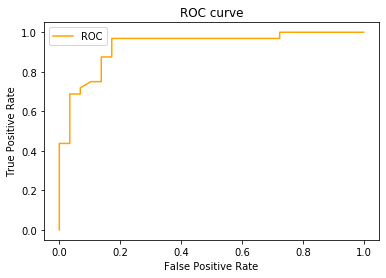

In [33]:
# Plotting ROC curves
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    # Plot curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Customise the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

### Confusion Matrix

Quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving the idea where model is getting confused.

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)
confusion_matrix(y_test, y_preds)


array([[24,  5],
       [ 4, 28]], dtype=int64)

In [9]:
# Visualise confusion matrix with pandas crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


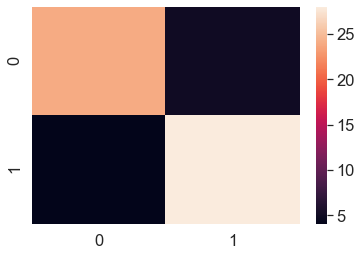

In [10]:
# Visualise confusion matrix with pandas crosstab
sns.set(font_scale=1.5)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot
sns.heatmap(conf_mat);

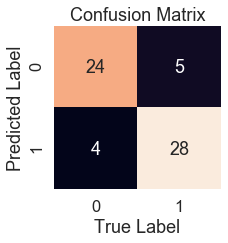

In [11]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix usiong Seaborn's heatmap
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    x = sns.heatmap(conf_mat,
                   annot=True,
                   cbar=False)
    
    # Customise the plot
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat)

### Classification Report

In [13]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 Regression model evaluation metrics

1. R^2 / Coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

### R^2

The default method for evaluating regressor model.
The R^2 method actually displays range between 0-1 or can be negative sometimes (poor model).

* If the value is exactly 0 that means  none of the predictions are mean of the target value.
* If the value is exactly 1 then the model predicts a range of numbers.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5106393318965518

In [20]:
from sklearn.metrics import r2_score

# Fill in array with y_test_mean
y_test_mean =np.full(len(y_test), y_test.mean())

In [21]:
r2_score(y_test, y_test_mean)

0.0

In [22]:
r2_score(y_test, y_test)

1.0

### MAE

Average of absolute difference between prediction and actual values.
* How wrong the models prediction is.

In [34]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)

mae

0.23754098360655734

The value above indicates that our model prediction can be  +- 0.2375...

In [35]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
179,0,0.03,0.03
228,0,0.58,0.58
111,1,0.47,-0.53
246,0,0.13,0.13
60,1,0.81,-0.19
...,...,...,...
249,0,0.52,0.52
104,1,0.99,-0.01
300,0,0.03,0.03
193,0,0.00,0.00


### MSE


In [32]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.12204426229508197

### Tidbit
 For regressin problem try to minimise MAE and MSE while maximise R^2

### 4.2.3 Using Scoring Parameter

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier()

np.random.seed(42)
cv_acc = cross_val_score(model, X_test, y_test, cv=5)
cv_acc

array([0.84615385, 0.75      , 0.66666667, 0.83333333, 0.91666667])

In [51]:
print(f"Heart Diease Classifier Cross-Validated-Accuracy: {np.mean(cv_acc) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-Accuracy: 80.26  %


In [54]:
# Cross Validated accuracy
np.random.seed(42)
cv_acc = cross_val_score(model, X_test, y_test, cv=5, scoring="accuracy")
print(f"Heart Diease Classifier Cross-Validated-Accuracy: {np.mean(cv_acc) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-Accuracy: 80.26  %


In [55]:
# Cross Validated precision
np.random.seed(42)
cv_precision = cross_val_score(model, X_test, y_test, cv=5, scoring="precision")
print(f"Heart Diease Classifier Cross-Validated-Precision: {np.mean(cv_precision) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-Precision: 78.93  %


In [56]:
# Cross Validated recall
np.random.seed(42)
cv_recall = cross_val_score(model, X_test, y_test, cv=5, scoring="recall")
print(f"Heart Diease Classifier Cross-Validated-Recall: {np.mean(cv_recall) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-Recall: 83.81  %


In [58]:
# Cross Validated f1
np.random.seed(42)
cv_f1 = cross_val_score(model, X_test, y_test, cv=5, scoring="f1")
print(f"Heart Diease Classifier Cross-Validated-f1: {np.mean(cv_f1) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-f1: 80.34  %


#### How about regression model?

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor
model = RandomForestRegressor()

In [60]:
# Cross Validated default
np.random.seed(42)
cv_score = cross_val_score(model, X_test, y_test, cv=5, scoring=None)
print(f"Heart Diease Classifier Cross-Validated-Deauflt: {np.mean(cv_score) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-Deauflt: 28.03  %


In [61]:
# Cross Validated r2
np.random.seed(42)
cv_r2 = cross_val_score(model, X_test, y_test, cv=5, scoring="r2")
print(f"Heart Diease Classifier Cross-Validated-R2: {np.mean(cv_r2) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-Deauflt: 28.03  %


In [68]:
# Cross Validated MAE
np.random.seed(42)
cv_mae = cross_val_score(model, X_test, y_test, cv=5, scoring="neg_mean_absolute_error")
print(f"Heart Diease Classifier Cross-Validated-MAE: {np.mean(cv_mae) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-MAE: -29.25  %


In [71]:
# Cross Validated MSE
np.random.seed(42)
cv_mse = cross_val_score(model, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
print(f"Heart Diease Classifier Cross-Validated-MSE: {np.mean(cv_mae) *100:.2f}  %")

Heart Diease Classifier Cross-Validated-MSE: -29.25  %


### 4.3 Using the dfiferent evaluation metrics as Scikit-Learn function

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [75]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"f1: {f1_score(y_test, y_preds)*100:.2f}%")

Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
f1: 86.15%


In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Import data 
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease

np.random.seed(42)
# Create Data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [77]:
# Evaluate the classifier
print(f"r2: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds)*100:.2f}%")
print(f"MSE: {mean_squared_error(y_test, y_preds)*100:.2f}%")

r2: 51.06%
MAE: 23.75%
MSE: 12.20%


## 5.Improving Model

* First Predictions = baseline predictions
* First Model = baseline model

### How to improve?

1. Ask Question on data presepective:
    * Could we collect more data? (more sample)
    * Could we improve our data? (more information on each sample)
    
2. Ask Question on model prespective:
    * Is there a better model?
    * Could improve the current model? 

3. Parameters vs Hyperparamters
    * Parameters = model find these patterns in data
    * Hyperparameters = settings on model you can adjust to (potentially) improve its ability to find patterns
    
4. Three ways to adjust Hyperparameters
    * by Hand
    * randomly with RandomSearchCV
    * Exhaustively with GridSearchCV

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 ### 5.1 Tuning hypermeters by hand
 
 Let's make 3 sets:
 1. Training
 2. Validation
 3. Test

We are going to adjust these hypermeters"
* 'max_depth'
* 'max_features'
* 'min
* 'min_samples_split'
* 'n-estimators'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv("Datas/heart-disease.csv")
heart_disease
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [51]:
def evaluate_preds(y_true, y_preds):
    """
    Perfoms evaluation comparison on y_true labels vs y_pred labels on a classifiication model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2),
    }
    
    print(f"Acc:{ accuracy * 100:.2f} %")
    print(f"Precision:{ precision * 100:.2f} %")
    print(f"Recall:{ recall * 100:.2f} %")
    print(f"f1:{ f1 * 100:.2f} %")
    
    return metric_dict

In [52]:
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # it is + sign because later we need to slice
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[:valid_split], y[:valid_split]

# Instantiate Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make baseline prediciton
y_preds = model.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:82.22 %
Precision:81.48 %
Recall:88.00 %
f1:84.62 %


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [53]:
np.random.seed(42)

# Create second classifier with adjusted hyperparamaters
model_2 = RandomForestClassifier(n_estimators=100,
                                max_depth=1)
model_2.fit(X_train, y_train)

# Make prediciton with different model but same data
y_preds_2 = model_2.predict(X_valid)

# Evaluate the 2nd classifier on validation set
model_2_metrics = evaluate_preds(y_valid, y_preds_2)
model_2_metrics 

Acc:80.00 %
Precision:78.57 %
Recall:88.00 %
f1:83.02 %


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.88, 'f1': 0.83}

 ### 5.2 Tuning hypermeters by RandomizedSearchCV

In [19]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "max_depth":[None, 5, 10, 20, 30],
    "max_features":["auto", "sqrt"],
    "min_samples_leaf":[1, 2, 4],
    "min_samples_split":[2, 4, 6],
    "n_estimators": [10, 100, 200, 500, 1000, 1200]}

np.random.seed(42)
# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [41]:
# Instantiate Random Forest Classifier
model = RandomForestClassifier(n_jobs=None)

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                             param_distributions=grid,
                             n_iter=10, #number of models to try
                             cv=5,
                             verbose=2)
# Fit the model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.4s finished


In [42]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [43]:
# Make predictions with best hyperparameters
rs_y_preds =rs_model.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:83.61 %
Precision:76.47 %
Recall:92.86 %
f1:83.87 %


 ### 5.3 Tuning hypermeters by GridSearchCV

In [34]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [44]:
grid_2 = {'max_depth': [20 ,30],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [4],
         'min_samples_split': [4],
         'n_estimators': [100, 200, 500]}

In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier(n_jobs=None)

# Setup RandomizedSearchCV
gs_model = GridSearchCV(estimator=model,
                             param_grid=grid_2,
                             cv=5,
                             verbose=2)
# Fit the GridSearchCVmodel
gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   20.0s finished


In [71]:
gs_model.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [72]:
# Make predictions with best hyperparameters
gs_y_preds =gs_model.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc:83.61 %
Precision:78.12 %
Recall:89.29 %
f1:83.33 %


## Compare our different model metrics

In [63]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "model_2": model_2_metrics,
    "rs": rs_metrics,
    "gs": gs_metrics,
})

compare_metrics

,baseline,model_2,rs,gs
accuracy,0.82,0.80,0.84,0.84
precision,0.81,0.79,0.76,0.78
recall,0.88,0.88,0.93,0.89
f1,0.85,0.83,0.84,0.83


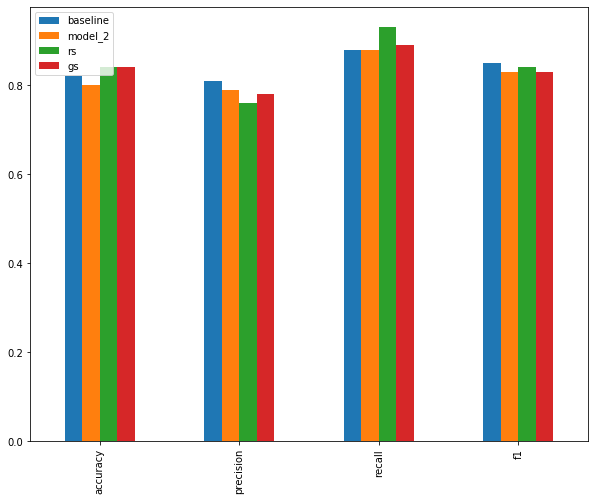

In [64]:
compare_metrics.plot.bar(figsize=(10,8));

##  6. Save and load a trained model

Two ways :
1. Pickle
2. Joblib

### Using Pickle module

In [73]:
import pickle 

# Save an exisiting model to file
pickle.dump(gs_model, open("Model/gs_random_forest_model_1.pkl", "wb"))

In [74]:
# Load saved model
loaded_pickle_model = pickle.load(open("Model/gs_random_forest_model_1.pkl", "rb"))

In [75]:
# Make some predicitions
gs_y_preds =loaded_pickle_model.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc:83.61 %
Precision:78.12 %
Recall:89.29 %
f1:83.33 %


### Using Joblib Module

In [76]:
from joblib import dump, load

# Save an exisiting model to file
dump(gs_model, filename="Model/gs_random_forest_model_1.joblib")

['Model/gs_random_forest_model_1.joblib']

In [77]:
# Load saved model
loaded_job_model =load(filename="Model/gs_random_forest_model_1.joblib")

In [78]:
# Make some predicitions
gs_y_preds =loaded_job_model.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc:83.61 %
Precision:78.12 %
Recall:89.29 %
f1:83.33 %


## 7. Putting altogether. AKA compile everything.

In [79]:
data = pd.read_csv("Datas/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [80]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [83]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [87]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np 
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("Datas/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer =Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps(fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                      transformers=[
                                ("cat", categorical_transformer, categorical_features),
                                ("door", door_transformer, door_feature),
                                ("num", numeric_transformer, numeric_features)
                                ])

# Creating a preprocessing and modelling Pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split Data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [88]:
# Use GridSearchCv with regression Pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_featur

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [89]:
gs_model.score(X_test, y_test)

0.3339554263158365